In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [218]:
df = pd.read_csv("medical_examination.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


**Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.**

In [219]:
df["height"] = (df["height"]/100).astype(float)
df["overweight"] = (df["weight"]/(df["height"])**2).astype(float)
df.loc[df['overweight'] <= 25.0, 'overweight'] = 0
df.loc[df['overweight'] > 25.0, 'overweight'] = 1
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,0.0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,1.0
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,0.0
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,1.0
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,0.0


**Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.**

<AxesSubplot:>

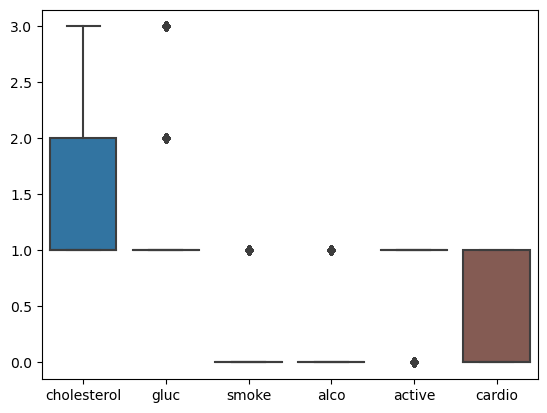

In [220]:
sns.boxplot(data=df[["cholesterol","gluc","smoke","alco","active","cardio"]])

<AxesSubplot:>

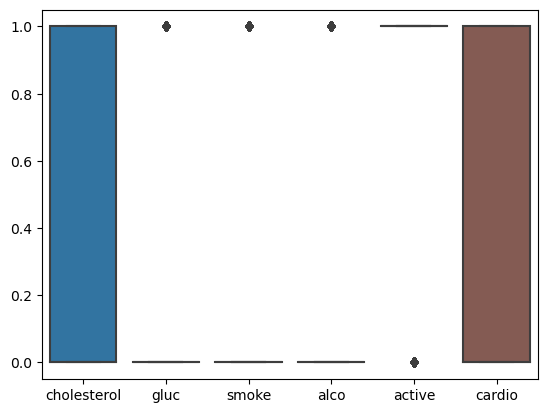

In [221]:
mapper = {1: 0, 0:1}
for col in ["cholesterol","gluc"]:
    df[col] = df[col].replace(mapper)
    df.loc[df[col] > 1,col] = 1

sns.boxplot(data=df[["cholesterol","gluc","smoke","alco","active","cardio"]])

**Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.**

In [222]:
df_melted = df.reset_index(drop=True).melt(id_vars=["cardio"],value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])
df_melted = pd.DataFrame(df_melted.groupby(["cardio","variable","value"])["value"].count())
df_melted.rename(columns={"value":"total"},inplace=True)
df_melted.reset_index(level=["cardio",'variable', 'value'],inplace=True)
df_melted

,cardio,variable,value,total
0,0,active,0.0,6378
1,0,active,1.0,28643
2,0,alco,0.0,33080
3,0,alco,1.0,1941
4,0,cholesterol,0.0,29330
5,0,cholesterol,1.0,5691
6,0,gluc,0.0,30894
7,0,gluc,1.0,4127
8,0,overweight,0.0,15915
9,0,overweight,1.0,19106


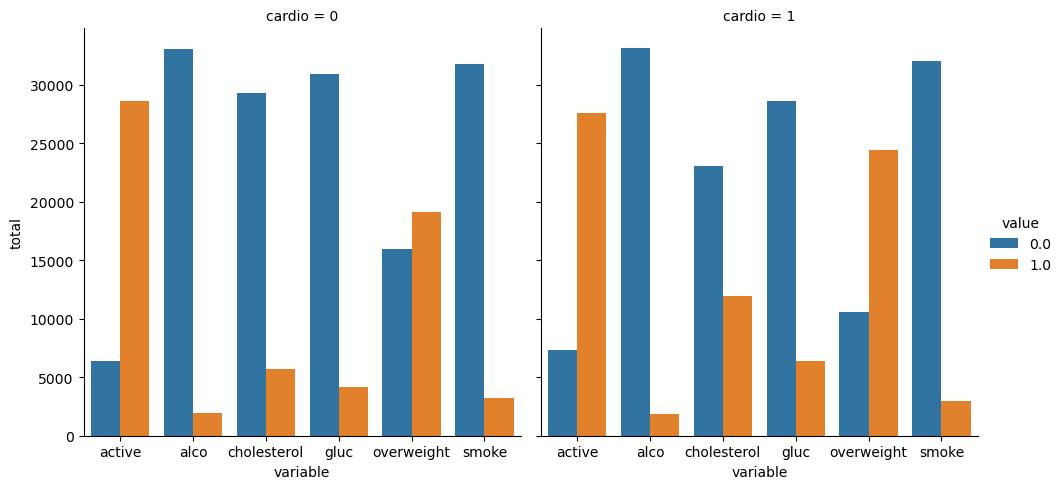

In [223]:
sns.catplot(data=df_melted,col="cardio",y="total",hue="value",x="variable",kind="bar")


**Clean the data. Filter out the following patient segments that represent incorrect data:**

* diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi'])).

* height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025))).

* height is more than the 97.5th percentile.

* weight is less than the 2.5th percentile.

* weight is more than the 97.5th percentile.

In [224]:
condition1 = df['ap_lo'] <= df['ap_hi']
condition2 = df['height'] >= df['height'].quantile(0.025)
condition3 = df['height'] <= df['height'].quantile(0.975)
condition4 = df['weight'] >= df['weight'].quantile(0.025)
condition5 = df['weight'] <= df['weight'].quantile(0.975)

df = df.loc[(condition1) & (condition2) & (condition3) & (condition4) & (condition5)]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,1.72,70.0,130,90,0,0,0,0,1,1,0.0
69994,99992,21074,1,1.65,80.0,150,80,0,0,0,0,1,1,1.0
69995,99993,19240,2,1.68,76.0,120,80,0,0,1,0,1,0,1.0
69998,99998,22431,1,1.63,72.0,135,80,0,1,0,0,0,1,1.0


**Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.**

<AxesSubplot:>

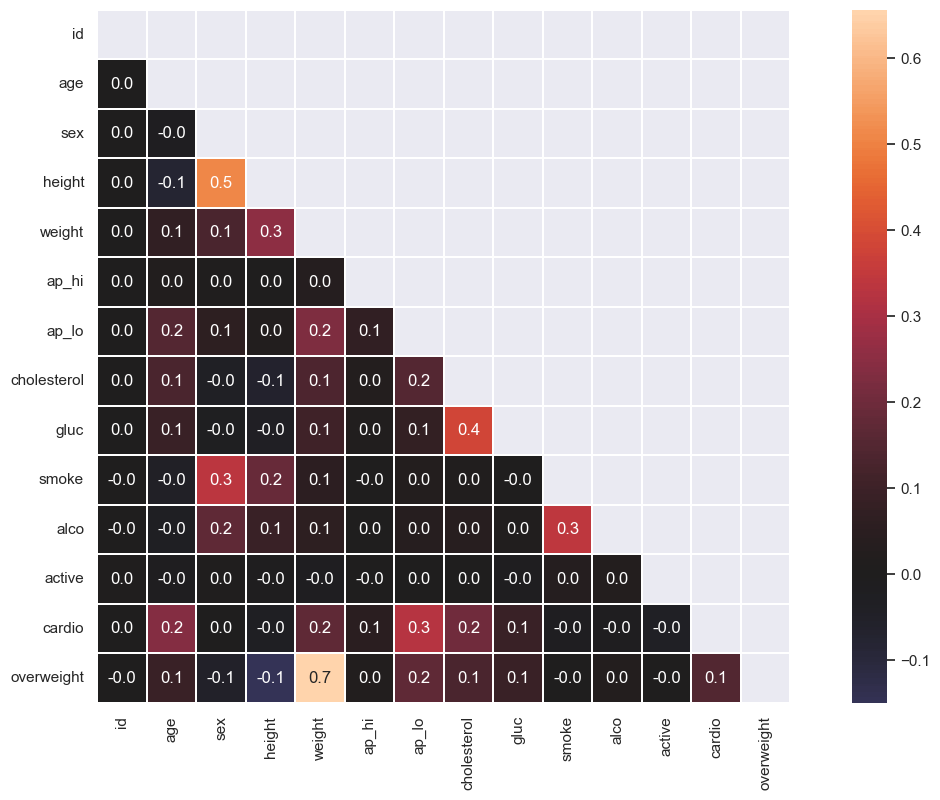

In [229]:
sns.set_theme()
plt.figure(figsize=(16,9))
corr_df = df.corr()
mask = np.triu(np.ones_like(corr_df.corr()))
sns.heatmap(data=corr_df,
            mask=mask,
            square=True,
            annot=True,
            fmt=".1f",
            linewidths=0.25,
            linecolor="white",
           center=0)